In [1]:
import pandas as pd

In [2]:
import insta as IG
insta = IG.Instagram()
insta.login()
insta.following()
insta.followers()

In [3]:
insta.get_photos()

100% [................................................................................] 6399 / 6399downloading photo:  lanceripro
100% [................................................................................] 5467 / 5467downloading photo:  olindalilicostapereira
100% [................................................................................] 7771 / 7771downloading photo:  guilhermedearamos
100% [..............................................................................] 12864 / 12864downloading photo:  hossam_webdev
100% [................................................................................] 9497 / 9497downloading photo:  bitcoin.hustler
100% [................................................................................] 4725 / 4725downloading photo:  projecto.in
100% [................................................................................] 2755 / 2755downloading photo:  programing_era
100% [....................................................

In [4]:
follower = pd.read_pickle('follower.pickle')
follower.shape

(502, 6)

In [5]:
following = pd.read_pickle('following.pickle')
following.shape

(572, 6)

In [6]:
following_not_follower = [x for x in following['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

275 ['pycoders', 'raquelchircop', 'ai_machine_learning', 'chapolinsincero', 'raropizza', 'wired', 'businessweek', 'rosyfranchipasquin', 'cesarssalim', 'rick_de_moraes', 'vtbellini', 'danovaester', 'gemudinhas', 'cosmojoseroberto', 'wilson_svieira', 'lulubasile', 'joaopiresinsta', 'claudionegon', 'danyel.fonseca', 'leticiadiasverona', 'lunacostaol', 'atatipelomundo', 'marcella_blok', 'julianasfonseca', 'jonathanavis', 'andrebastos187', 'alfredoborgesp', 'drppacheco', 'cristianacamarate', 'mianafelipe', 'ernanisouzacosta', 'marcoaur.oficial', 'jineriebetancurt', 'ysdomingues', 'dra.chrisprado', 'showdajessica', 'matheusbo', '13allan', 'raquelflinker', 'bielo_m', 'beatriz.cabral.felicidade', 'seu_hulk', 'juliopitombo', 'leandrogrisoni', 'allinetblemos', 'mnrcruz85', 'wearedefcon', 'birinasdoguana', 'isphus1973', 'filipedeschamps', 'juliacfranco', 'robertobscosta', 'gavic37', 'psicologa_julianovaes', 'julipima', 'recreiocanoas', 'canoada_vila', 'pauloalvesromao', 'martal.borges', 'raspberr

In [7]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

187 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [8]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,293,293,293,293,293
Seguir,191,191,191,191,191
Solicitado,18,18,18,18,18


In [9]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [10]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
501,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,harley_monica1,Money Harley,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a69...
495,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,programing_era,#Programing_era,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/cfe...
489,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,lanceripro,Lanceripro,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3be...
491,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,guilhermedearamos,Guilherme Ramos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ce8...
492,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,hossam_webdev,Hossam | Web Developer,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b55...
493,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,bitcoin.hustler,Crypto Meme Page,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/46e...
494,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,projecto.in,Computer Science Students,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/42e...
490,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,olindalilicostapereira,Olinda Lili,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/250...
496,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,liorkaravani1,Lior Karavani,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2e0...
497,2019-08-02 16:15:06.808376,2019-08-02 16:15:06.808376,giannis_iliakidis,Giannis,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ccf...


In [11]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
22,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,fatornerdoficial,𝔽𝕒𝕥𝕠𝕣 𝕟𝕖𝕣𝕕,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c9...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...


In [12]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
571,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,alinemassa79,Aline Massa,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/fbd...
562,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,gal_gadot,Gal Gadot,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/363...
553,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,olindalilicostapereira,Olinda Lili,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/250...
554,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,guilhermedearamos,Guilherme Ramos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ce8...
555,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,grubergruber,Olavo Gruber,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b94...
556,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,learn.machinelearning,Machine learning,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e0c...
558,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,geeks_for_geeks,GeeksforGeeks,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/d06...
559,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,worldeconomicforum,World Economic Forum,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2a2...
560,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,sergiofigueiredomelg,Sérgio Figueiredo Melgaço,Seguindo,https://instagram.fsdu6-1.fna.fbcdn.net/vp/cbd...
561,2019-08-02 16:09:49.126894,2019-08-02 16:09:49.126894,realmadrid,Real Madrid C.F.,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/41b...


In [13]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...


In [14]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [15]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
565,2019-07-30 10:29:44.220296,2019-08-02 16:09:49.126894,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
644,2019-07-30 10:29:44.220296,2019-08-02 16:09:49.126894,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-02 16:15:06.808376,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
197,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
48,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,_gabicabral,,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/d5...
323,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,_gustavoayala_,Gustavo Ayala,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/91...
68,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,_luizpinheiro,Luiz Felipe Pinheiro,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2c...
166,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,_victoriazevedo,Victória Azevedo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/0f...
72,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,a19vm,41 72 73 61 6c 61 6e (Hex),Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c6...


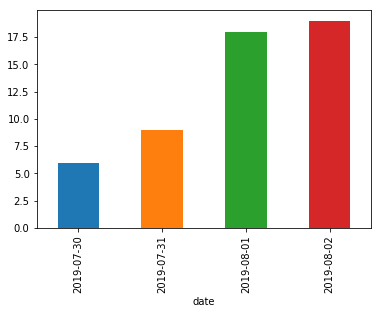

In [18]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[1:].plot(kind='bar')

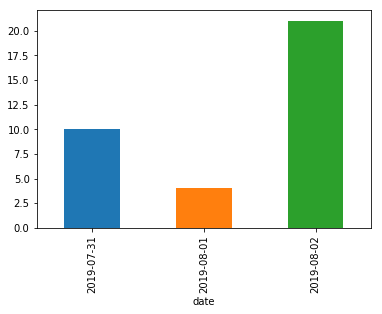

In [17]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')